In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# What is k-NN?

k-NN is known as the k nearest neighbour techinique! It is used as a supervised learning model to predict the classification of a new entry

We classify a new entry by looking at the 'k' nearest neighbour and the majority of the class label determines the label for the new entry

## The 3 steps to k-NN

Step 1: Calculate Euclidean Distance.
Step 2: Get Nearest Neighbors.
Step 3: Make Predictions.

Given a dataset, we want to first split it into training and testing dataset using k-fold splitting

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [31]:
df.shape[0]
df.iloc[0,:]

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

Each row of data corrsponds to one flower and the variety, hence, since the variables are all continuous, we can actually find the euclidean distance between every flower. 

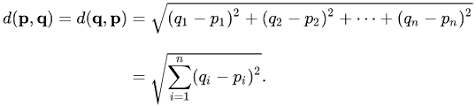

In [33]:
def euclid_dist(row1,row2):
    dist = 0
    #here we assume that every row is a list/matrix and we want to find the distance 
    for i in range(len(row1)):
        dist += (row1[i]-row2[i])**2
    return math.sqrt(dist)

In [35]:
#let us test the formula
row1 = [2,3,4]
row2 = [1,1,1]
euclid_dist(row1,row2)
#if we get 3.74, the formula is correct

3.7416573867739413

now we need to store all the distances from every row relative to a new entry and then rank the distances

In [124]:
def kNN(k,new_entry,data,target):
    distances = []
    res=[]
    for i in range(data.shape[0]):
        #we append the distance for the distance between the new entry and the every datapoint
        distances.append([euclid_dist(new_entry,data.iloc[i,:]),target[i]])
    #print(distances)
    
    # we want the disrances to be sorted by the least to the most
    distances.sort()
    #print(distances)
    
    #next we only pick the 'k' nearest neighbour to be considered
    consideration = distances[:k]
    #print(consideration)
    
    #now we need to conduct voting and find the label for the data
    for j in range(k):
        res.append(consideration[j][-1])
    return max(res)
    
        
        

In [93]:
## this is for testing

labels = df.iloc[:,-1]
#print(labels)
indep = df.drop(columns=['variety'],axis=1)
#print(indep)
kNN(3,[2,3,4],indep.iloc[0:10,:],labels)

[[3.539774004085572, 'Setosa'], [3.608323710533743, 'Setosa'], [3.698648401781386, 'Setosa'], [3.8236108588610325, 'Setosa'], [3.8301436004411116, 'Setosa'], [3.8948684188300895, 'Setosa'], [3.925557285278104, 'Setosa'], [4.014971979976947, 'Setosa'], [4.076763422127901, 'Setosa'], [4.202380277890139, 'Setosa']]
[[3.539774004085572, 'Setosa'], [3.608323710533743, 'Setosa'], [3.698648401781386, 'Setosa']]


'Setosa'

## Now let us create a sample dataset to test this

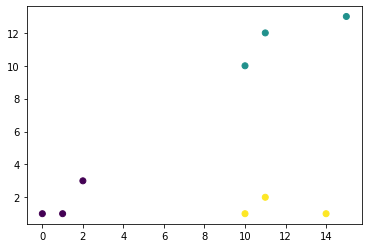

In [113]:
sample_data2= pd.DataFrame([[0,1,0],[1,1,0],[2,3,0],[10,10,1],[11,12,1],[15,13,1],[10,1,2],[11,2,2],[14,1,2]])
sample_data= np.array([[0,1,0],[1,1,0],[2,3,0],[10,10,1],[11,12,1],[15,13,1],[10,1,2],[11,2,2],[14,1,2]])
plt.scatter(sample_data[:,0],sample_data[:,1],c=sample_data[:,2])

#we have created the sample dataset already, let us create a new data and test


In [127]:
test_data1 = [8,2]
test_data2 = [1.5,2]
test_data3 = [10,12]
trg = sample_data2.iloc[:,0:2]
target = sample_data2.iloc[:,2]
#print(target)
#print(trg)

#let us test the data
print('The label is {}'.format(kNN(3,test_data1,trg,target))) # we expect this to be 2
print('The label is {}'.format(kNN(3,test_data2,trg,target))) # we expect this to be 0
print('The label is {}'.format(kNN(3,test_data3,trg,target))) # we expect this to be 1

The label is 2
The label is 0
The label is 1
